   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country income-range  
0          2174             0              40   United-States  

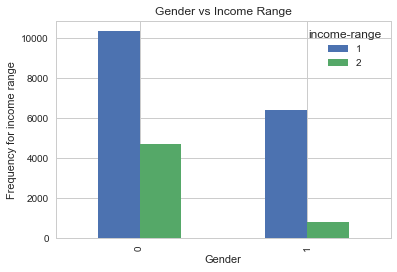

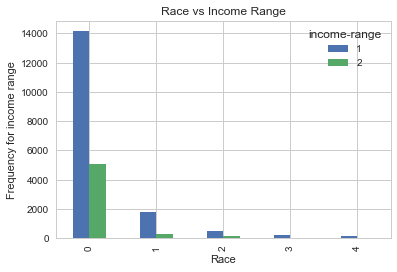

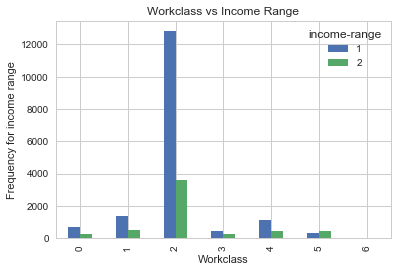

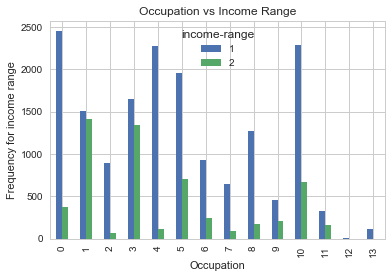

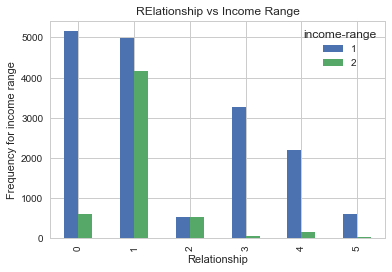

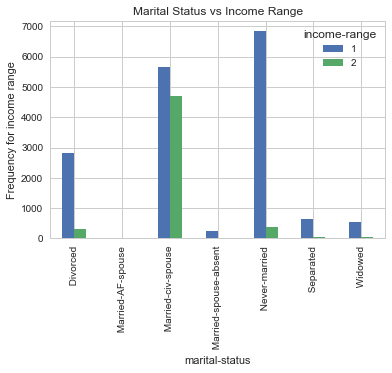

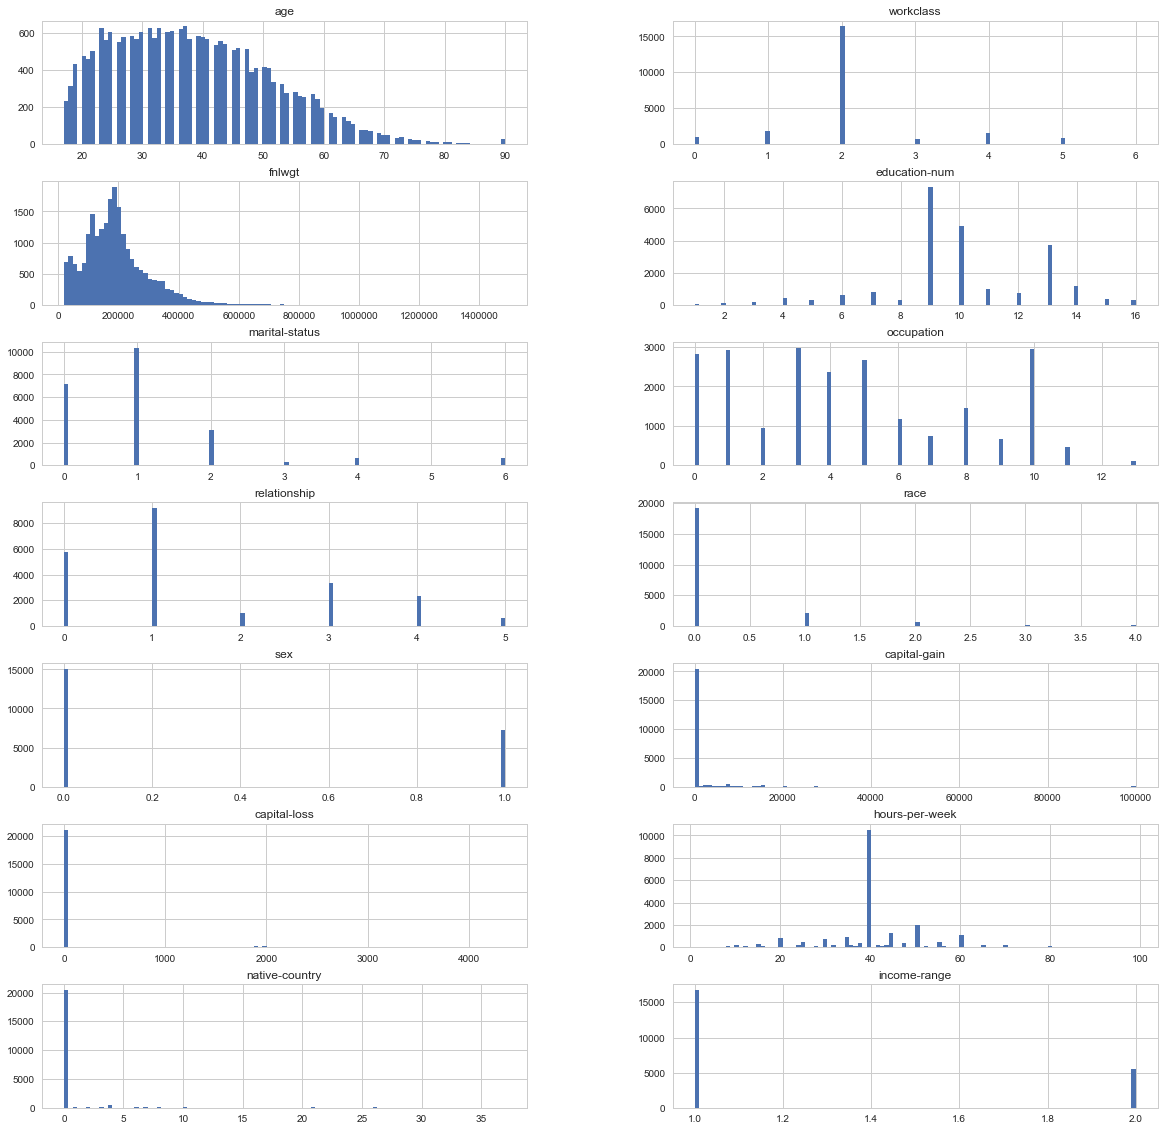

age
workclass
fnlwgt
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
income-range


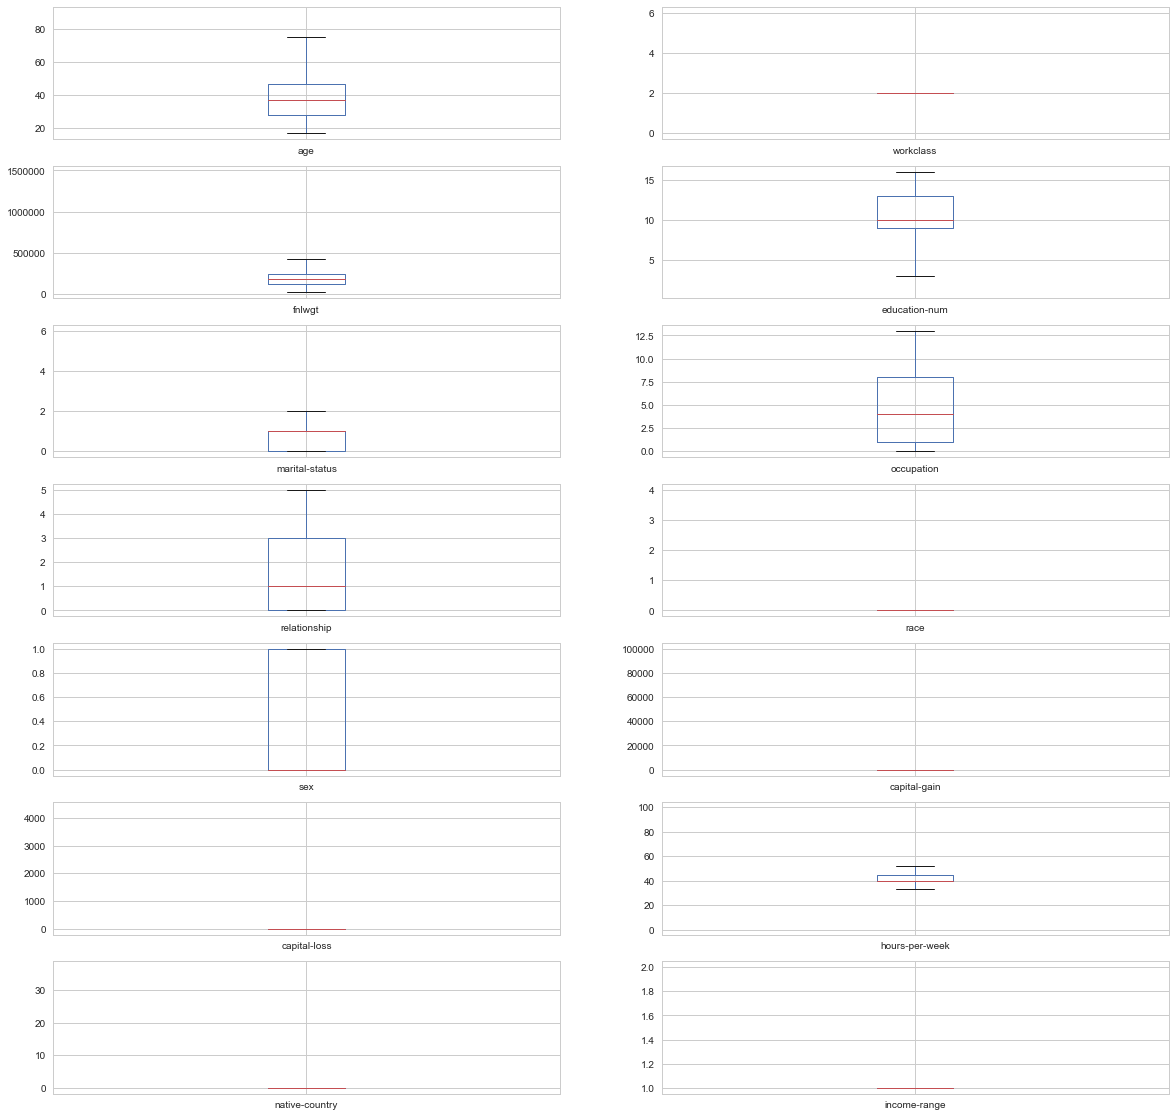

[0 4 5 6 9]
[ 0  3  8  9 11]
[ 0  2  9 10 11]
   age  marital-status  occupation  relationship  capital-gain
0   39               0           0             0          2174
1   50               1           1             1             0
2   38               2           2             0             0
3   53               1           2             1             0
4   28               1           3             2             0
   age  education-num  sex  capital-gain  hours-per-week
0   39             13    0          2174              40
1   50             13    0             0              13
2   38              9    0             0              40
3   53              7    0             0              40
4   28             13    1             0              40
   age  fnlwgt  capital-gain  capital-loss  hours-per-week
0   39   77516          2174             0              40
1   50   83311             0             0              13
2   38  215646             0             0              4

In [ ]:
import pandas as pd
from os.path import isfile, isdir
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

"""
#column names taken from https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 Description of fnlwgt (final weight)
|
| The weights on the CPS files are controlled to independent estimates of the
| civilian noninstitutional population of the US.  These are prepared monthly
| for us by Population Division here at the Census Bureau.  We use 3 sets of
| controls.
|  These are:
|          1.  A single cell estimate of the population 16+ for each state.
|          2.  Controls for Hispanic Origin by age and sex.
|          3.  Controls by Race, age and sex.
|
| We use all three sets of controls in our weighting program and "rake" through
| them 6 times so that by the end we come back to all the controls we used.
|
| The term estimate refers to population totals derived from CPS by creating
| "weighted tallies" of any specified socio-economic characteristics of the
| population.
|
| People with similar demographic characteristics should have
| similar weights.  There is one important caveat to remember
| about this statement.  That is that since the CPS sample is
| actually a collection of 51 state samples, each with its own
| probability of selection, the statement only applies within
| state.
"""
    


df = pd.read_csv('adult.data', sep=",", header=None, index_col = False, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income-range" ])
print(df.head())

#since education and education-num are the same info, remove education

df = df.drop('education', axis = 1)
list(df)
#Removing NA values and replacing them with 0
df.fillna(0, inplace = True)
#Removing duplicate values
df.drop_duplicates(inplace = True)

#remove rows with unknown values in any column

df = df[(df['workclass'] == ' State-gov') | (df['workclass'] == ' Self-emp-not-inc') | (df['workclass'] ==  ' Private') | (df['workclass'] ==  ' Federal-gov') | (df['workclass'] == ' Local-gov')
 | (df['workclass'] ==  ' Self-emp-inc') | (df['workclass'] == ' Without-pay') | (df['workclass'] == ' Never-worked')]

#df[~((df['workclass'] != ' State-gov') & (df['workclass'] != ' Self-emp-not-inc') & (df['workclass'] !=  ' Private') & (df['workclass'] !=  ' Federal-gov') & (df['workclass'] != ' Local-gov')
# & (df['workclass'] !=  ' Self-emp-inc') & (df['workclass'] != ' Without-pay') & (df['workclass'] != ' Never-worked'))]
#df['workclass'].replace('\?', 'XYZ')
#df[df.C.str.contains("?") == False]

df = df[(df['occupation'] == ' Adm-clerical') | (df['occupation'] == ' Exec-managerial') | (df['occupation'] ==  ' Handlers-cleaners') | (df['occupation'] ==  ' Prof-specialty') | (df['occupation'] == ' Other-service')
 | (df['occupation'] ==  ' Sales') | (df['occupation'] == ' Craft-repair') | (df['occupation'] == ' Transport-moving') 
 | (df['occupation'] ==  ' Farming-fishing') | (df['occupation'] == ' Machine-op-inspct') | (df['occupation'] == ' Tech-support') 
 | (df['occupation'] ==  ' Protective-serv') | (df['occupation'] == ' Armed-Forces') | (df['occupation'] == ' Priv-house-serv')]

df = df[(df['native-country'] == ' United-States') |  (df['native-country'] == ' Cuba') |  (df['native-country'] == ' Jamaica') |  
(df['native-country'] == ' India') |  (df['native-country'] == ' Mexico') |  (df['native-country'] == ' Canada') |  
(df['native-country'] == ' Honduras') |  (df['native-country'] == ' England') |  (df['native-country'] == ' Poland') |  
(df['native-country'] == ' Germany') |  (df['native-country'] == ' Iran') |  (df['native-country'] == ' Philippines') |  
(df['native-country'] == ' Columbia') |  (df['native-country'] == ' Cambodia') |  (df['native-country'] == ' Thailand') |  
(df['native-country'] == ' Ecuador') |  (df['native-country'] == ' Laos') |  (df['native-country'] == ' Taiwan' ) |  
(df['native-country'] == ' Haiti') |  (df['native-country'] == ' Portugal') |  (df['native-country'] == ' Dominican-Republic') |  
(df['native-country'] == ' El-Salvador') |  (df['native-country'] == ' France') |  (df['native-country'] == ' Guatemala') |  
(df['native-country'] == ' Italy') |  (df['native-country'] == ' China') |  (df['native-country'] == ' South') |  
(df['native-country'] == ' Japan') |  (df['native-country'] == ' Yugoslavia') |  (df['native-country'] == ' Peru') |  
(df['native-country'] == ' Outlying-US\(Guam-USVI-etc\)') |  (df['native-country'] == ' Scotland') | ( df['native-country'] == ' Trinadad\&Tobago') |  
(df['native-country'] == ' Greece') |  (df['native-country'] == ' Hungary') |  (df['native-country'] == ' Holand-Netherlands') |  
(df['native-country'] == ' Ireland') | ( df['native-country'] == ' Nicaragua') |  (df['native-country'] == ' Vietnam') |  
(df['native-country'] == ' Hong')] 
  

print(df['workclass'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['marital-status'].unique())
print(df.shape)

    
  

df['workclass'] = df['workclass'].map({' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, 
    ' Federal-gov': 3, ' Local-gov': 4, ' Self-emp-inc': 5, ' Without-pay': 6})

df['occupation'] = df['occupation'].map({' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2,
 ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Transport-moving': 6, ' Farming-fishing': 7,
 ' Machine-op-inspct': 8, ' Tech-support': 9, ' Craft-repair':10, ' Protective-serv': 11,
 ' Armed-Forces': 12, ' Priv-house-serv': 13})


df['relationship'] = df['relationship'].map({' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, 
                    ' Unmarried': 4, ' Other-relative': 5})

df['race'] = df['race'].map({' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4})

df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})

df['native-country'] = df['native-country'].map({' United-States': 0, ' Cuba': 1, ' Jamaica': 2,
 ' India': 3, ' Mexico': 4, ' Honduras': 5, ' England': 6, ' Canada': 7, ' Germany': 8,
 ' Iran': 9, ' Philippines': 10, ' Poland': 11, ' Columbia': 12, ' Cambodia': 13,
 ' Thailand': 14, ' Ecuador': 15, ' Laos': 16, ' Taiwan': 17, ' Haiti': 18,
 ' Portugal': 19, ' Dominican-Republic': 20, ' El-Salvador': 21, ' France': 22, ' Guatemala': 23,
 ' Italy': 24, ' China': 25, ' South': 26, ' Japan': 27, ' Yugoslavia': 28, ' Peru': 29, ' Scotland': 30,
 ' Greece':31, ' Nicaragua':32, ' Vietnam':33, ' Hong':34, ' Ireland':35, ' Hungary':36,
 ' Holand-Netherlands':37})

print(df['income-range'].unique())

df['income-range'].replace(' <=', ' <=50K', inplace = True)

df['income-range'] = df['income-range'].map({' <=50K': 1, ' >50K': 2})
print(df['income-range'].unique())

#Plot the columns which have few unique values to the output variable, to see if there is a dependence

pd.crosstab(df['sex'],df['income-range']).plot(kind='bar')
plt.title('Gender vs Income Range')
plt.xlabel('Gender')
plt.ylabel('Frequency for income range')
plt.savefig('Gender vs Income Range')

pd.crosstab(df['race'],df['income-range']).plot(kind='bar')
plt.title('Race vs Income Range')
plt.xlabel('Race')
plt.ylabel('Frequency for income range')
plt.savefig('Race vs Income Range')

pd.crosstab(df['workclass'],df['income-range']).plot(kind='bar')
plt.title('Workclass vs Income Range')
plt.xlabel('Workclass')
plt.ylabel('Frequency for income range')
plt.savefig('Workclass vs Income Range')

pd.crosstab(df['occupation'],df['income-range']).plot(kind='bar')
plt.title('Occupation vs Income Range')
plt.xlabel('Occupation')
plt.ylabel('Frequency for income range')
plt.savefig('Occupation vs Income Range')

pd.crosstab(df['relationship'],df['income-range']).plot(kind='bar')
plt.title('RElationship vs Income Range')
plt.xlabel('Relationship')
plt.ylabel('Frequency for income range')
plt.savefig('Relationship vs Income Range')

pd.crosstab(df['marital-status'],df['income-range']).plot(kind='bar')
plt.title('Marital Status vs Income Range')
plt.xlabel('marital-status')
plt.ylabel('Frequency for income range')
plt.savefig('Marital Status vs Income Range')


df_test = pd.read_csv('adult.test', sep=",", header=None, index_col = False, skiprows = 1, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income-range" ])
df_test = df_test.drop('education', axis = 1)
print(df_test.shape)
df_test.fillna(0, inplace = True)
df_test.drop_duplicates(inplace = True)

#remove rows with unknown values in any column

df_test = df_test[(df_test['workclass'] == ' State-gov') | (df_test['workclass'] == ' Self-emp-not-inc') | (df_test['workclass'] ==  ' Private') | (df_test['workclass'] ==  ' Federal-gov') | (df_test['workclass'] == ' Local-gov')
 | (df_test['workclass'] ==  ' Self-emp-inc') | (df_test['workclass'] == ' Without-pay') | (df_test['workclass'] == ' Never-worked')]

#df[~((df['workclass'] != ' State-gov') & (df['workclass'] != ' Self-emp-not-inc') & (df['workclass'] !=  ' Private') & (df['workclass'] !=  ' Federal-gov') & (df['workclass'] != ' Local-gov')
# & (df['workclass'] !=  ' Self-emp-inc') & (df['workclass'] != ' Without-pay') & (df['workclass'] != ' Never-worked'))]
#df['workclass'].replace('\?', 'XYZ')
#df[df.C.str.contains("?") == False]

df_test = df_test[(df_test['occupation'] == ' Adm-clerical') | (df_test['occupation'] == ' Exec-managerial') | (df_test['occupation'] ==  ' Handlers-cleaners') | (df_test['occupation'] ==  ' Prof-specialty') | (df_test['occupation'] == ' Other-service')
 | (df_test['occupation'] ==  ' Sales') | (df_test['occupation'] == ' Craft-repair') | (df_test['occupation'] == ' Transport-moving') 
 | (df_test['occupation'] ==  ' Farming-fishing') | (df_test['occupation'] == ' Machine-op-inspct') | (df_test['occupation'] == ' Tech-support') 
 | (df_test['occupation'] ==  ' Protective-serv') | (df_test['occupation'] == ' Armed-Forces') | (df_test['occupation'] == ' Priv-house-serv')]

df_test = df_test[(df_test['native-country'] == ' United-States') |  (df_test['native-country'] == ' Cuba') |  (df_test['native-country'] == ' Jamaica') |  
(df_test['native-country'] == ' India') |  (df_test['native-country'] == ' Mexico') |  (df_test['native-country'] == ' Canada') |  
(df_test['native-country'] == ' Honduras') |  (df_test['native-country'] == ' England') |  (df_test['native-country'] == ' Poland') |  
(df_test['native-country'] == ' Germany') |  (df_test['native-country'] == ' Iran') |  (df_test['native-country'] == ' Philippines') |  
(df_test['native-country'] == ' Columbia') |  (df_test['native-country'] == ' Cambodia') |  (df_test['native-country'] == ' Thailand') |  
(df_test['native-country'] == ' Ecuador') |  (df_test['native-country'] == ' Laos') |  (df_test['native-country'] == ' Taiwan' ) |  
(df_test['native-country'] == ' Haiti') |  (df_test['native-country'] == ' Portugal') |  (df_test['native-country'] == ' Dominican-Republic') |  
(df_test['native-country'] == ' El-Salvador') |  (df_test['native-country'] == ' France') |  (df_test['native-country'] == ' Guatemala') |  
(df_test['native-country'] == ' Italy') |  (df_test['native-country'] == ' China') |  (df_test['native-country'] == ' South') |  
(df_test['native-country'] == ' Japan') |  (df_test['native-country'] == ' Yugoslavia') |  (df_test['native-country'] == ' Peru') |  
(df_test['native-country'] == ' Outlying-US\(Guam-USVI-etc\)') |  (df_test['native-country'] == ' Scotland') | ( df_test['native-country'] == ' Trinadad\&Tobago') |  
(df_test['native-country'] == ' Greece') |  (df_test['native-country'] == ' Hungary') |  (df_test['native-country'] == ' Holand-Netherlands') |  
(df_test['native-country'] == ' Ireland') | ( df_test['native-country'] == ' Nicaragua') |  (df_test['native-country'] == ' Vietnam') |  
(df_test['native-country'] == ' Hong')] 

df['marital-status'] = df['marital-status'].map({' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2,
 ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6})


df_test['workclass'] = df_test['workclass'].map({' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, 
    ' Federal-gov': 3, ' Local-gov': 4, ' Self-emp-inc': 5, ' Without-pay': 6})

df_test['occupation'] = df_test['occupation'].map({' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2,
 ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Transport-moving': 6, ' Farming-fishing': 7,
 ' Machine-op-inspct': 8, ' Tech-support': 9, ' Craft-repair':10, ' Protective-serv': 11,
 ' Armed-Forces': 12, ' Priv-house-serv': 13})


df_test['relationship'] = df_test['relationship'].map({' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, 
                    ' Unmarried': 4, ' Other-relative': 5})

df_test['race'] = df_test['race'].map({' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4})

df_test['sex'] = df_test['sex'].map({' Male': 0, ' Female': 1})

df_test['native-country'] = df_test['native-country'].map({' United-States': 0, ' Cuba': 1, ' Jamaica': 2,
 ' India': 3, ' Mexico': 4, ' Honduras': 5, ' England': 6, ' Canada': 7, ' Germany': 8,
 ' Iran': 9, ' Philippines': 10, ' Poland': 11, ' Columbia': 12, ' Cambodia': 13,
 ' Thailand': 14, ' Ecuador': 15, ' Laos': 16, ' Taiwan': 17, ' Haiti': 18,
 ' Portugal': 19, ' Dominican-Republic': 20, ' El-Salvador': 21, ' France': 22, ' Guatemala': 23,
 ' Italy': 24, ' China': 25, ' South': 26, ' Japan': 27, ' Yugoslavia': 28, ' Peru': 29, ' Scotland': 30,
 ' Greece':31, ' Nicaragua':32, ' Vietnam':33, ' Hong':34, ' Ireland':35, ' Hungary':36,
 ' Holand-Netherlands':37})

df_test['marital-status'] = df_test['marital-status'].map({' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2,
 ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6})

print(df_test['income-range'].unique())
df_test['income-range'].replace(' <=', ' <=50K', inplace = True)
print(df_test['income-range'].unique())
df_test['income-range'] = df_test['income-range'].map({' <=50K.': 1, ' >50K.': 2})
print(df_test['income-range'].unique())

print(df_test.head())



#//divide with integer, discard remainder
hfig, haxes = plt.subplots(len(df.columns)//2, 2, figsize=(20,20))
   
i = 0
for sevenaxis in haxes:
    for axis in sevenaxis:
        print(df.columns[i])
        df.hist(column = df.columns[i], bins = 100, ax=axis)
        i = i+1
        
plt.show()

bfig, baxes = plt.subplots(len(df.columns)//2, 2, figsize=(20,20))
i = 0
for sevenaxis in baxes:
    for axis in sevenaxis:
        print(df.columns[i])
        df.boxplot(column = df.columns[i], ax=axis)
        i = i+1
        
plt.show()


#Remove output variable from training data
x1 = df.drop('income-range', axis = 1)
y1 = df['income-range']

#Remove output variable from testing data
vx1 = df_test.drop('income-range', axis = 1)
vy1 = df_test['income-range']

scaler = StandardScaler().fit(x1)
x2 = scaler.transform(x1)  

pca = PCA(n_components = 13)
x3 = pca.fit_transform(x2)
#print(pca.components_)


#Try various selectors
# Create and fit selector
selector1 = SelectKBest(mutual_info_classif, k=5)
selector1.fit(x1, y1)
# Get idxs of columns to keep
idxs_selected = selector1.get_support(indices=True)
print(idxs_selected)
c_list = x1.columns.tolist()
n_list = []
for i in idxs_selected:
    n_list.append(c_list[i])
train1 = x1[n_list]
test1 = vx1[n_list]

selector2 = SelectKBest(f_classif, k=5)
selector2.fit(x1, y1)
# Get idxs of columns to keep
idxs_selected = selector2.get_support(indices=True)
print(idxs_selected)
n_list = []
for i in idxs_selected:
    n_list.append(c_list[i])
train2 = x1[n_list]
test2 = vx1[n_list]

selector3 = SelectKBest(chi2, k=5)
selector3.fit(x1, y1)
# Get idxs of columns to keep
idxs_selected = selector3.get_support(indices=True)
print(idxs_selected)
n_list = []
for i in idxs_selected:
    n_list.append(c_list[i])
train3 = x1[n_list]
test3 = vx1[n_list]

print(train1.head())
print(train2.head())
print(train3.head())




lnr = LinearRegression()
model = lnr.fit(x1,y1)
predictions = lnr.predict(vx1)
print("Linear regression score using all 10 features: ", lnr.score(vx1, vy1))

model = lnr.fit(train1,y1)
predictions = lnr.predict(test1)
print("Linear regression score using the 5 best selected features by mutual_info_classif: ", lnr.score(test1, vy1))

model = lnr.fit(train2,y1)
predictions = lnr.predict(test2)
print("Linear regression score using the 5 best selected features by f_classif: ", lnr.score(test2, vy1))

model = lnr.fit(train3,y1)
predictions = lnr.predict(test3)
print("Linear regression score using the 5 best selected features by chi2: ", lnr.score(test3, vy1))

#x1 = x1.drop('fnlwgt', axis = 1)
#vx1 = vx1.drop('fnlwgt', axis = 1)
#c_list.remove('fnlwgt')

#Dropping fnlwgt or dropping race and sex and age give similar results. fnlwgt is a function of race, sex and age according to documentation in the source data website.
x1 = x1.drop(['race', 'age', 'sex'], axis = 1)
vx1 = vx1.drop(['race', 'age', 'sex'], axis = 1)
#c_list.remove('race', 'age', 'sex')
c_list = list(x1.columns)

logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(x1, y1 )


n_list = []
for i in range(10):
    if (rfe.support_[i]):
        n_list.append(c_list[i])
        
        
train4 = x1[n_list]
test4 = vx1[n_list]

rfe2 =RFE(logreg, 5)
rfe2 = rfe2.fit(x1, y1)

n_list = []
for i in range(5):
    if (rfe2.support_[i]):
        n_list.append(c_list[i])
        
        
train5 = x1[n_list]
test5 = vx1[n_list]



logreg.fit(train4, y1)
print("Logistic regression score using all 10 features: ",logreg.score(test4, vy1))

logreg.fit(train5, y1)
print("Logistic regression score using 5 features: ",logreg.score(test5, vy1))

print("Features selected: ", c_list)


dtr = DecisionTreeRegressor()
model = dtr.fit(train4, y1)
print("Decision Tree score: ",dtr.score(test4, vy1))

model = svm.SVC(kernel='rbf', C=1, gamma=1) 
model.fit(train4, y1)
print("SVM: ", model.score(test4, vy1))



